<a href="https://colab.research.google.com/github/sabhinav3/Intro_to_ML/blob/project/Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

# Read data
new_data = pd.read_csv('new_data.csv')
print(new_data.head())

   B_30_0.0  B_30_1.0  B_30_2.0  B_38_1.0  B_38_2.0  B_38_3.0  B_38_4.0  \
0  1.000000  0.000000       0.0       0.0      1.00      0.00       0.0   
1  0.666667  0.333333       0.0       0.0      0.00      0.00       1.0   
2  1.000000  0.000000       0.0       0.0      1.00      0.00       0.0   
3  1.000000  0.000000       0.0       0.0      0.25      0.75       0.0   
4  1.000000  0.000000       0.0       0.0      1.00      0.00       0.0   

   B_38_5.0  B_38_6.0  B_38_7.0  ...  D_136  D_137  D_138     D_139     D_140  \
0       0.0       0.0       0.0  ...    NaN    NaN    NaN  0.002242  0.007860   
1       0.0       0.0       0.0  ...    NaN    NaN    NaN  0.007466  0.003879   
2       0.0       0.0       0.0  ...    NaN    NaN    NaN  1.001422  0.007045   
3       0.0       0.0       0.0  ...    NaN    NaN    NaN  0.004723  0.004019   
4       0.0       0.0       0.0  ...    NaN    NaN    NaN  0.005221  0.000509   

      D_141     D_142     D_143     D_144     D_145  
0  0.008

In [ ]:
# put 30% in test. This is a random split which is not ideal. Ideally we would like to split based on another variable, for example time.
# Note that both test and train should be unbiased samples of the whole population.
from sklearn.model_selection import train_test_split
X_train,X_test1, Y_train, Y_test1 = train_test_split(new_data.drop('target', axis=1), new_data['target'], test_size=0.3, random_state=67)
X_test1, X_test2, Y_test1, Y_test2 = train_test_split(X_test1,Y_test1, test_size=0.5, random_state=67)

In [ ]:
X_train.shape

(54271, 222)

In [ ]:
# check - it is a good practice to compare test and train samples to make sure they are not fundamentally different.
# If so, we will get high variance even with a non-overfitted model.
# Here we compare bad rate in both samples.
print (sum(Y_train)/len(Y_train))
print (sum(Y_test1)/len(Y_test1))
print (sum(Y_test2)/len(Y_test2))

0.256232610418087
0.2535683576956148
0.24453998280309544


In [ ]:
print("X_test1 shape: ", X_test1.shape)
print("Y_test1 shape: ", Y_test1.shape)

X_test1 shape:  (11630, 222)
Y_test1 shape:  (11630,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [ ]:
X_train_standard = sc.transform(X_train)
X_test1_standard = sc.transform(X_test1)
X_test2_standard = sc.transform(X_test2)

In [ ]:
# convert to Pandas DF
X_train_normalized = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_standard, columns=X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_standard, columns=X_test2.columns)

In [ ]:
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
B_30_0.0,54271.0,-4.400019e-16,1.000009,-2.586485,-2.586485,0.455319,0.455319,0.455319
B_30_1.0,54271.0,8.237838e-17,1.000009,-0.434496,-0.434496,-0.434496,2.692810,2.692810
B_30_2.0,54271.0,-9.810369e-16,1.000009,-0.128445,-0.128445,-0.128445,6.073319,12.275082
B_38_1.0,54271.0,-1.906390e-16,1.000009,-0.553976,-0.553976,-0.553976,1.981023,1.981023
B_38_2.0,54271.0,1.708464e-15,1.000009,-0.761626,-0.761626,-0.761626,1.430962,1.430962
...,...,...,...,...,...,...,...,...
D_141,53580.0,9.490666e-17,1.000009,-0.480268,-0.479301,-0.464052,2.398041,3.008978
D_142,9685.0,-1.257527e-16,1.000052,-1.678143,-1.616500,-0.042684,2.550502,7.198424
D_143,53580.0,-4.454982e-18,1.000009,-0.479666,-0.478839,-0.464877,2.176853,2.180043
D_144,54022.0,5.584819e-18,1.000009,-0.294976,-0.293351,-0.265462,5.231260,7.167383


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a function to cap and floor values
def cap_floor_values(df, lower_percentile, upper_percentile):
    for col in df.columns:
        lower_value = df[col].quantile(lower_percentile)
        upper_value = df[col].quantile(upper_percentile)
        df[col] = np.where(df[col] < lower_value, lower_value, df[col])
        df[col] = np.where(df[col] > upper_value, upper_value, df[col])
    return df

# Define a function to preprocess the data
def preprocess_data(df, scaler=None, lower_percentile=0.01, upper_percentile=0.99):
    # Apply cap and floor on the data
    df_normalized = cap_floor_values(df, lower_percentile, upper_percentile)

    # Replace missing values with 0
    df_normalized = df_normalized.fillna(0)

    if scaler is None:
        # Initialize the scaler based on the data
        scaler = StandardScaler().fit(df_normalized)

    # Standardize the data
    df_normalized = scaler.transform(df_normalized)

    return df_normalized, scaler

# Apply the preprocess_data method on the train set
X_train_normalized, scaler = preprocess_data(X_train)

# Apply the preprocess_data method on test set 1
X_test1_normalized, _ = preprocess_data(X_test1, scaler)

# Apply the preprocess_data method on test set 2
X_test2_normalized, _ = preprocess_data(X_test2, scaler)

In [ ]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized, columns=X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_normalized, columns=X_test2.columns)

In [ ]:
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

,count,mean,std,min,1%,50%,99%,max
B_30_0.0,54271.0,-4.400019e-16,1.000009,-2.586485,-2.586485,0.455319,0.455319,0.455319
B_30_1.0,54271.0,8.237838e-17,1.000009,-0.434496,-0.434496,-0.434496,2.692810,2.692810
B_30_2.0,54271.0,-1.366365e-16,1.000009,-0.140367,-0.140367,-0.140367,8.270897,8.270897
B_38_1.0,54271.0,-1.906390e-16,1.000009,-0.553976,-0.553976,-0.553976,1.981023,1.981023
B_38_2.0,54271.0,1.708464e-15,1.000009,-0.761626,-0.761626,-0.761626,1.430962,1.430962
...,...,...,...,...,...,...,...,...
D_141,54271.0,-4.727822e-17,1.000009,-0.476651,-0.476651,-0.460449,2.420204,2.421300
D_142,54271.0,9.730260e-16,1.000009,-0.388680,-0.388680,-0.388680,3.838873,5.204370
D_143,54271.0,-5.553161e-17,1.000009,-0.475912,-0.475912,-0.461186,2.193820,2.193865
D_144,54271.0,4.691204e-17,1.000009,-0.300986,-0.299270,-0.269948,5.510127,5.527617


In [ ]:
import xgboost as xgb

In [ ]:
xgb_instance = xgb.XGBClassifier()

In [ ]:
xgb_instance = xgb.XGBClassifier() # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.

model_feature_selection = xgb_instance.fit(X_train_normalized,Y_train)
model_feature_selection

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
f_i = {'Feature':X_train_normalized.columns,'Importance':model_feature_selection.feature_importances_}
f_i = pd.DataFrame(f_i)
f_i.sort_values("Importance", inplace=True,ascending=False)
f_i

,Feature,Importance
46,P_2,0.218611
48,B_1,0.073702
70,B_9,0.020023
50,R_1,0.014081
63,D_48,0.013706
...,...,...
39,D_68_1.0,0.000000
45,B_31,0.000000
114,D_73,0.000000
147,D_87,0.000000


In [ ]:
# choose featires with FI higher than 0.5%
features = f_i["Feature"][f_i.Importance > 0.005]

X1_train = X_train_normalized[features]
X1_test1 = X_test1_normalized[features]
X1_test2 = X_test2_normalized[features]
features

46           P_2
48           B_1
70           B_9
50           R_1
63          D_48
56          D_44
54          D_42
51           S_3
58          D_45
49           B_2
100         B_18
37      D_66_1.0
180         B_37
4       B_38_2.0
21     D_120_0.0
64          D_49
77          B_11
55          D_43
53           B_3
27       D_63_CO
68          D_50
117         D_75
61          D_46
85          D_56
52          D_41
181         R_26
1       B_30_1.0
69          D_51
33        D_64_O
73           P_3
Name: Feature, dtype: object

In [ ]:
model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5)
model.fit(X_train_normalized, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
##feature_importance = model.feature_importances_

f_i_1 = {'Feature':X_train_normalized.columns,'Importance':model.feature_importances_}
f_i_1 = pd.DataFrame(f_i_1)
f_i_1.sort_values("Importance", inplace=True,ascending=False)
f_i_1

,Feature,Importance
46,P_2,0.118464
63,D_48,0.055030
48,B_1,0.053291
93,D_61,0.024718
100,B_18,0.019721
...,...,...
45,B_31,0.000000
147,D_87,0.000000
30,D_63_XM,0.000000
204,B_42,0.000000


In [ ]:
features_1 = f_i_1["Feature"][f_i_1.Importance > 0.005]

X2_train = X_train_normalized[features_1]
X2_test1 = X_test1_normalized[features_1]
X2_test2 = X_test2_normalized[features_1]
features_1


46           P_2
63          D_48
48           B_1
93          D_61
100         B_18
54          D_42
49           B_2
51           S_3
70           B_9
53           B_3
81           S_7
58          D_45
71           R_3
55          D_43
85          D_56
50           R_1
68          D_50
67           B_8
96          D_62
69          D_51
19     D_117_5.0
169         S_23
60           R_2
Name: Feature, dtype: object

In [ ]:


def filter_features_by_importance(f_i, f_i_1, X_train_normalized, X_test1_normalized, X_test2_normalized, threshold=0.005):
    # Merge feature_importance and f_i_1 DataFrames
    merged_feature_importance = pd.concat([f_i, f_i_1], ignore_index=True)

    # Group by 'Feature' and calculate the maximum importance across both models
    max_importance = merged_feature_importance.groupby('Feature')['Importance'].max().reset_index()

    # Filter features that have importance greater than the threshold in either of the two models
    filtered_features = max_importance[max_importance['Importance'] > threshold]['Feature']

    # Select the filtered features in the normalized datasets
    X3_train = X_train_normalized[filtered_features]
    X3_test1 = X_test1_normalized[filtered_features]
    X3_test2 = X_test2_normalized[filtered_features]

    return X3_train, X3_test1, X3_test2

# Assuming you have your DataFrames feature_importance, f_i_1, X_train_normalized, X_test1_normalized, X_test2_normalized
# You can call the method as follows:
X3_train, X3_test1, X3_test2 = filter_features_by_importance(f_i, f_i_1, X_train_normalized, X_test1_normalized, X_test2_normalized)



In [1]:
# pip install --upgrade tensorflow

In [2]:
pip install keras

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import roc_auc_score

def create_model(num_hidden_layers, num_nodes, activation_fn, dropout_rate):
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=X3_train.shape[1], activation=activation_fn))  # first layer needs input dimension

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_nodes, activation=activation_fn))
        if dropout_rate < 1.0:
            model.add(Dropout(1-dropout_rate))  # Dropout rate in keras is the fraction to drop

    model.add(Dense(units=1, activation='sigmoid'))  # Output layer

    optimizer = Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

    return model

# empty list to hold results
results = []

# grid search parameters
num_layers = [2, 4]
num_nodes = [4, 6]
activations = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]
batch_sizes = [100, 10000]
epochs = 20

for layers in num_layers:
    for nodes in num_nodes:
        for activation in activations:
            for dropout_rate in dropout_rates:
                for batch_size in batch_sizes:
                    model = create_model(layers, nodes, activation, dropout_rate)
                    history = model.fit(X3_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # predict probabilities for train set
                    proba_train = model.predict(X3_train).ravel()

                    # compute AUC for train set
                    auc_train = roc_auc_score(Y_train, proba_train)

                    # predict probabilities for test1
                    proba_test1 = model.predict(X3_test1).ravel()

                    # compute AUC for test1
                    auc_test1 = roc_auc_score(Y_test1, proba_test1)

                    # predict probabilities for test2
                    proba_test2 = model.predict(X3_test2).ravel()

                    # compute AUC for test2
                    auc_test2 = roc_auc_score(Y_test2, proba_test2)

                    # save the results
                    results.append({
                        'num_layers': layers,
                        'num_nodes': nodes,
                        'activation': activation,
                        'dropout_rate': dropout_rate,
                        'batch_size': batch_size,
                        'train_auc': auc_train,
                        'test1_auc': auc_test1,
                        'test2_auc': auc_test2
                    })

# convert results to a DataFrame
results_data = pd.DataFrame(results)


364/364 [==============================] - 1s 2ms/step


In [ ]:
results_data

,num_layers,num_nodes,activation,dropout_rate,batch_size,train_auc,test1_auc,test2_auc
0,2,4,relu,0.5,100,0.935058,0.934641,0.933149
1,2,4,relu,0.5,10000,0.842669,0.838407,0.843490
2,2,4,relu,1.0,100,0.935354,0.934714,0.933384
3,2,4,relu,1.0,10000,0.876406,0.875503,0.875575
4,2,4,tanh,0.5,100,0.934690,0.933643,0.932839
5,2,4,tanh,0.5,10000,0.847122,0.846090,0.843558
6,2,4,tanh,1.0,100,0.935301,0.933963,0.932964
7,2,4,tanh,1.0,10000,0.901273,0.901392,0.904023
8,2,6,relu,0.5,100,0.935915,0.935082,0.932933
9,2,6,relu,0.5,10000,0.906839,0.908790,0.903845


In [ ]:
def find_best_model(results_data, train_threshold=0.85, difference_threshold=0.05):
    # Initialize the best_auc as 0
    best_auc = 0
    # Initialize the best model as None
    best_model = None

    # Loop through each row in the dataframe
    for index, row in results_data.iterrows():
        # Calculate the maximum difference between train AUC and test AUCs
        max_difference = max(abs(row['train_auc'] - row['test1_auc']), abs(row['train_auc'] - row['test2_auc']))

        # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
        if row['train_auc'] > train_threshold and max_difference < difference_threshold:
            # Check if this model has a higher average AUC score on the test sets than the current best model
            average_test_auc = (row['test1_auc'] + row['test2_auc']) / 2
            if average_test_auc > best_auc:
                # Update the best_auc and best_model
                best_auc = average_test_auc
                best_model = row

    return best_model

# Assuming you have the results_data DataFrame and the defined thresholds train_threshold and difference_threshold
# You can call the method as follows:
best_model = find_best_model(results_data, train_threshold=0.85, difference_threshold=0.05)

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("There was no model discovered that satisfied the required conditions.")


num_layers             4
num_nodes              6
activation          relu
dropout_rate         1.0
batch_size           100
train_auc       0.936699
test1_auc       0.935885
test2_auc       0.934248
Name: 26, dtype: object


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


# Create the model with the optimal parameters
model = Sequential()
model.add(Dense(6, input_dim=X3_train.shape[1], activation='relu'))

for _ in range(4 - 1):  # subtract 1 because we already added the first layer
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.0))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

# Fit the model
model.fit(X3_train, Y_train, epochs=20, batch_size=100, verbose=1)

# Save the model
model.save('final_model.h5')


Epoch 1/20
543/543 [==============================] - 4s 4ms/step - loss: 0.3427 - auc: 0.9014
Epoch 2/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2885 - auc: 0.9304
Epoch 3/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2847 - auc: 0.9323
Epoch 4/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2830 - auc: 0.9331
Epoch 5/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2821 - auc: 0.9336
Epoch 6/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2814 - auc: 0.9339
Epoch 7/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2809 - auc: 0.9341
Epoch 8/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2803 - auc: 0.9344
Epoch 9/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2799 - auc: 0.9345
Epoch 10/20
543/543 [==============================] - 2s 4ms/step - loss: 0.2796 - auc: 0.9347
Epoch 11/20
543/543 [============================

C:\Users\Deepthi Ghanta\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


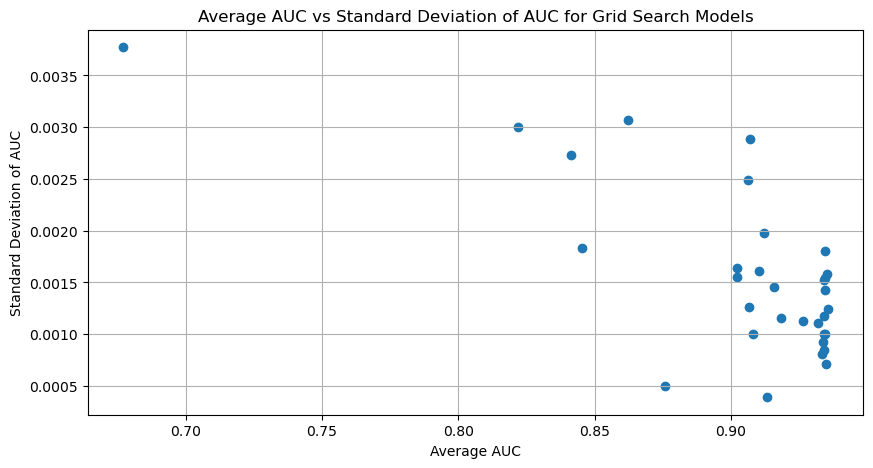

In [ ]:
import matplotlib.pyplot as plt
# Calculate average and standard deviation of AUCs
results_data['Average AUC'] = results_data[['train_auc', 'test1_auc', 'test2_auc']].mean(axis=1)
results_data['Standard Deviation AUC'] = results_data[['train_auc', 'test1_auc', 'test2_auc']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 5))
plt.scatter(results_data['Average AUC'], results_data['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

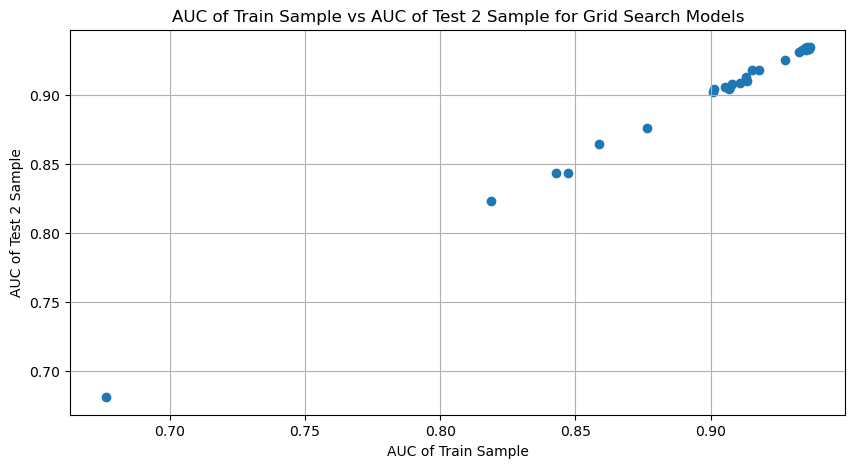

In [ ]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(results_data['train_auc'], results_data['test2_auc'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()


364/364 [==============================] - 1s 3ms/step


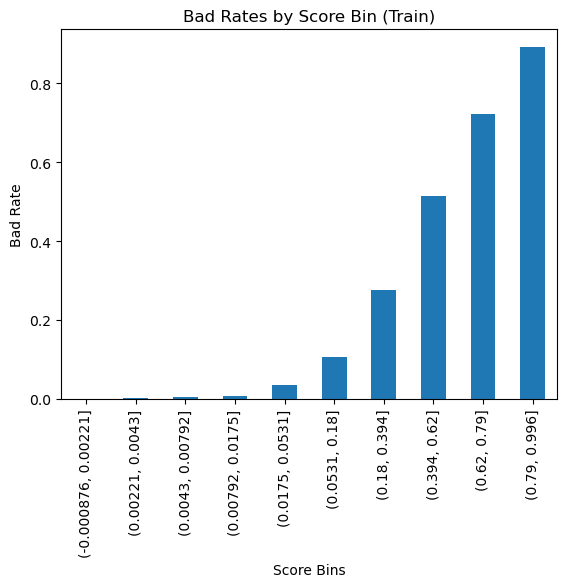

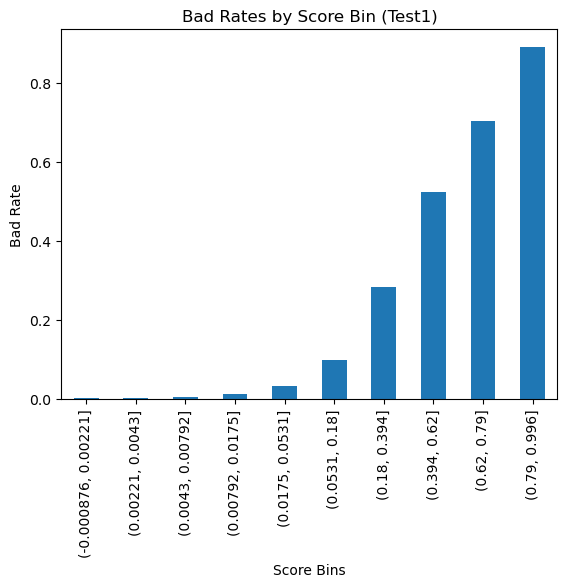

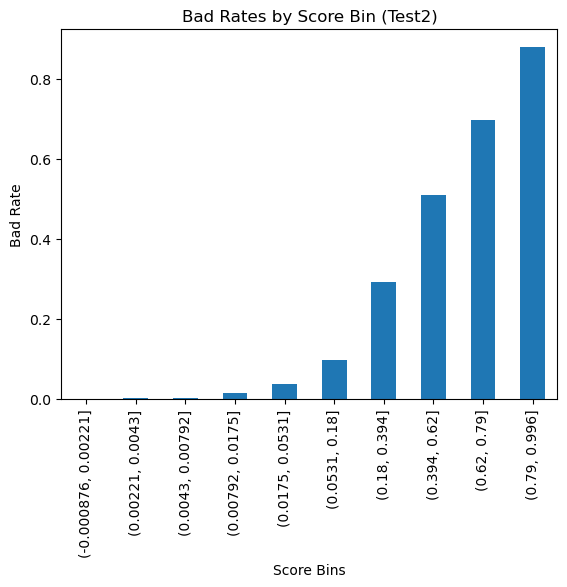

In [ ]:
import matplotlib.pyplot as plt

# Compute predicted probabilities
prob_train = model.predict(X3_train)
prob_test1 = model.predict(X3_test1)
prob_test2 = model.predict(X3_test2)

# Create score bins based on train sample predictions
quantiles = pd.qcut(prob_train.flatten(), q=10, precision=3, retbins=True, duplicates='drop')[1]

# Function to compute bad rates and plot bar chart
def compute_bad_rate_chart(y_true, y_pred, quantiles, set_name):
    dd = pd.DataFrame({"Actual": y_true, "Prediction": y_pred.flatten()})
    dd["Score Bins"] = pd.cut(dd["Prediction"], bins=quantiles, include_lowest=True)
    stat = dd.groupby("Score Bins")["Actual"].mean()

    stat.plot(kind='bar', title=f'Bad Rates by Score Bin ({set_name})')
    plt.ylabel('Bad Rate')
    plt.show()

# Compute bad rates and plot bar chart for each set
compute_bad_rate_chart(Y_train, prob_train, quantiles, 'Train')
compute_bad_rate_chart(Y_test1, prob_test1, quantiles, 'Test1')
compute_bad_rate_chart(Y_test2, prob_test2, quantiles, 'Test2')


In [ ]:
def compute_bad_rate_chart(y_true, y_pred, quantiles):
    # Create a DataFrame with the actual outcomes and predicted probabilities
    dd = pd.DataFrame({'Actual': y_true, 'Prediction': y_pred.flatten()})

    # Apply the score bins to the DataFrame
    dd['Score Bin'] = pd.cut(dd['Prediction'], bins=quantiles, include_lowest=True)

    # Compute the bad rates in each bin
    dd['Bad Rate']= dd.groupby('Score Bin')['Actual'].transform('mean')

    return dd.drop_duplicates('Score Bin')

# Compute bad rates for each set
compute_train = compute_bad_rate_chart(Y_train, prob_train, quantiles)
compute_test1 = compute_bad_rate_chart(Y_test1, prob_test1, quantiles)
compute_test2 = compute_bad_rate_chart(Y_test2, prob_test2, quantiles)

print('Rank Ordering:')
print(compute_train)

Rank Ordering:
       Actual  Prediction             Score Bin  Bad Rate
40789     0.0    0.024783      (0.0175, 0.0531]  0.034826
77001     0.0    0.561644         (0.394, 0.62]  0.513912
52302     0.0    0.015019     (0.00792, 0.0175]  0.008476
54835     0.0    0.005986     (0.0043, 0.00792]  0.006081
66414     0.0    0.215535         (0.18, 0.394]  0.276764
67077     0.0    0.170307        (0.0531, 0.18]  0.105952
58943     1.0    0.951134         (0.79, 0.996]  0.891653
35832     1.0    0.631479          (0.62, 0.79]  0.721025
75430     0.0    0.002009  (-0.000876, 0.00221]  0.000921
19921     0.0    0.003497     (0.00221, 0.0043]  0.002764


In [ ]:
# Compute predicted probabilities for Neural Network
Y_train_pred_nn = model.predict(X3_train)

# Create DataFrame with actual and predicted values
perf_train_data_nn = pd.DataFrame({"Actual": Y_train, "Prediction": Y_train_pred_nn.flatten()})

# Define score bins based on the quantiles of predictions
quantiles_nn = list(set(perf_train_data_nn.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles_nn.sort()
quantiles_nn.insert(0,0)
quantiles_nn.insert(len(quantiles_nn),1)

# Apply score bins to the DataFrame
perf_train_data_nn["Score Bins"] = pd.cut(perf_train_data_nn["Prediction"], quantiles_nn)

# Compute "Bad Rate" (default rate) in each bin
stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat_nn["Bad Rate"] = stat_nn["sum"] / stat_nn["count"]

# Print "Bad Rate" for each score bin
print(stat_nn)


1696/1696 [==============================] - 4s 3ms/step
                      sum  count  Bad Rate
Score Bins                                
(0.0, 0.00221]        5.0   5428  0.000921
(0.00221, 0.0043]    15.0   5427  0.002764
(0.0043, 0.00792]    33.0   5427  0.006081
(0.00792, 0.0175]    46.0   5427  0.008476
(0.0175, 0.0531]    189.0   5427  0.034826
(0.0531, 0.18]      575.0   5427  0.105952
(0.18, 0.394]      1502.0   5427  0.276764
(0.394, 0.62]      2789.0   5427  0.513912
(0.62, 0.79]       3913.0   5427  0.721025
(0.79, 1.0]        4839.0   5427  0.891653


In [ ]:
stat_nn = stat_nn.reset_index()

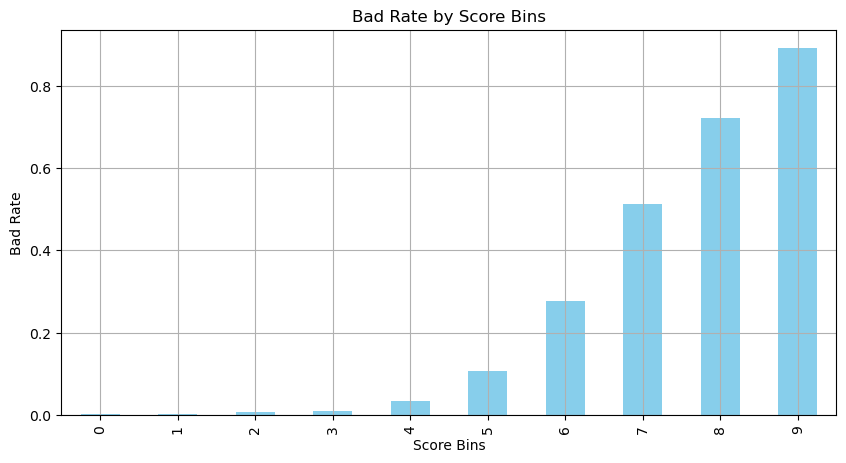

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat_nn['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()


In [ ]:
# Compute predicted probabilities for Neural Network
Y_train_pred_nn = model.predict(X3_test1)

# Create DataFrame with actual and predicted values
perf_train_data_nn = pd.DataFrame({"Actual": Y_test1, "Prediction": Y_train_pred_nn.flatten()})

# Define score bins based on the quantiles of predictions
quantiles_nn = list(set(perf_train_data_nn.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles_nn.sort()
quantiles_nn.insert(0,0)
quantiles_nn.insert(len(quantiles_nn),1)

# Apply score bins to the DataFrame
perf_train_data_nn["Score Bins"] = pd.cut(perf_train_data_nn["Prediction"], quantiles_nn)

# Compute "Bad Rate" (default rate) in each bin
stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat_nn["Bad Rate"] = stat_nn["sum"] / stat_nn["count"]

# Print "Bad Rate" for each score bin
print(stat_nn)


364/364 [==============================] - 1s 3ms/step
                       sum  count  Bad Rate
Score Bins                                 
(0.0, 0.00217]         3.0   1163  0.002580
(0.00217, 0.00427]     3.0   1163  0.002580
(0.00427, 0.00767]     7.0   1163  0.006019
(0.00767, 0.0167]     13.0   1163  0.011178
(0.0167, 0.0498]      38.0   1163  0.032674
(0.0498, 0.173]      106.0   1163  0.091144
(0.173, 0.39]        323.0   1163  0.277730
(0.39, 0.613]        606.0   1163  0.521066
(0.613, 0.788]       816.0   1163  0.701634
(0.788, 1.0]        1034.0   1163  0.889080


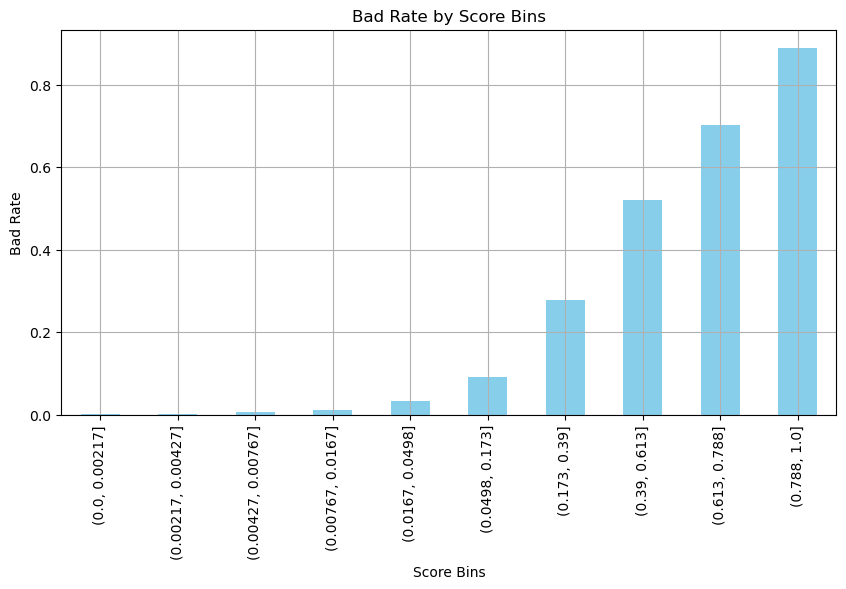

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat_nn['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()
